# Feature Extraction
Let's devise a method to extract data from other shapefiles and convert to our rasterized "fishnet" space. We will use the Chicago Data Portal's [Zoning District Boundaries](https://data.cityofchicago.org/Community-Economic-Development/Boundaries-Zoning-Districts-current-/7cve-jgbp) dataset to refine this process.

In [11]:
# geopandas imports
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import geometry

# directory
import os
current_dir = os.path.dirname("")
data_path = os.path.join(current_dir, "../data")

# load fishnet and zoning districts
zoning_gdf = gpd.read_file(
    os.path.join(
        data_path, "external/shp/Zoning Districts/geo_export_4323e422-3f1c-41fd-8236-62751bbe28a0.shp"
        )
    )

fishnet = gpd.read_file(
    os.path.join(
        data_path, "interim/shp/fishnet/chicago_fishnet_500.shp"
    )
)

# convert zoning crs
zoning_gdf = zoning_gdf.to_crs(fishnet.crs).copy()

In [45]:
# filter useful features from zoning_gdf
filtered_zoning_gdf = zoning_gdf[["shape_area", "zone_class", "geometry"]]

# convert zoning classes to first two in string
filtered_zoning_gdf.loc[:,"zone_class"] = filtered_zoning_gdf["zone_class"].apply(
    lambda x: x[0:2]
)


In [47]:
filtered_zoning_gdf.head()

,shape_area,zone_class,geometry
0,41101.346359,C2,"POLYGON ((1153940.051 1898308.852, 1153958.960..."
1,3981.020122,B1,"POLYGON ((1156424.300 1887300.523, 1156391.160..."
2,21286.192360,C2,"POLYGON ((1161253.990 1889686.600, 1161183.736..."
3,489097.720164,M2,"POLYGON ((1158190.474 1883989.269, 1158190.344..."
4,350813.081204,PD,"MULTIPOLYGON (((1167162.899 1897465.800, 11671..."


In [65]:
# note that join operation creates multiple instances in the same location.
extracted = gpd.sjoin(fishnet, filtered_zoning_gdf, how="left", predicate="intersects")

# extract nan values in resultant dataframe
sorted_extracted = extracted.sort_values(by="shape_area", ascending = False).dropna()

# keep largest by zone area
filtered_extracted = sorted_extracted.drop_duplicates(subset = "FID", keep='first')

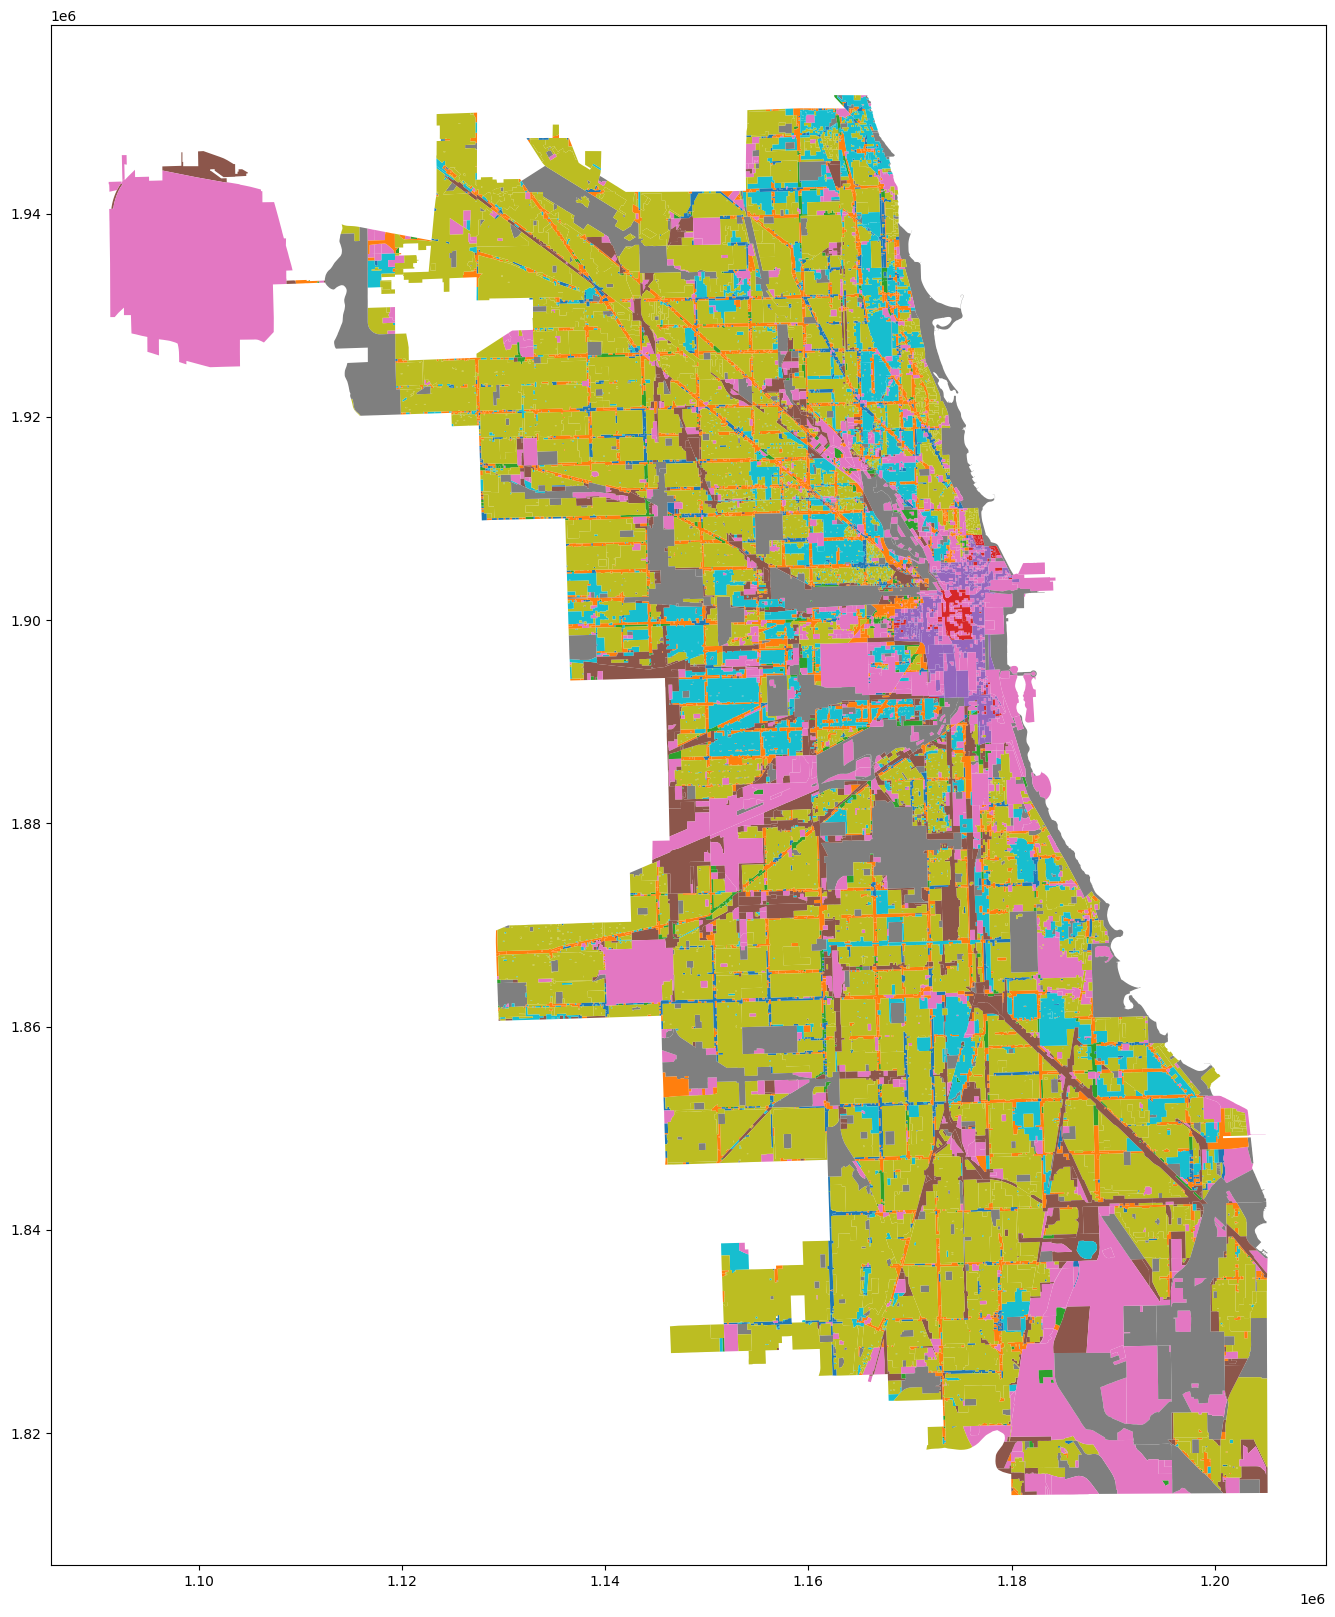

In [66]:
fig, ax = plt.subplots(figsize = (20,20))
filtered_zoning_gdf.plot(column="zone_class", ax = ax)
plt.show()

In [67]:
test = set(list(filtered_zoning_gdf.zone_class.unique()))

In [68]:
test2 = set(list(filtered_extracted.zone_class.unique()))

In [69]:
test == test2

# can confirm that this works

True

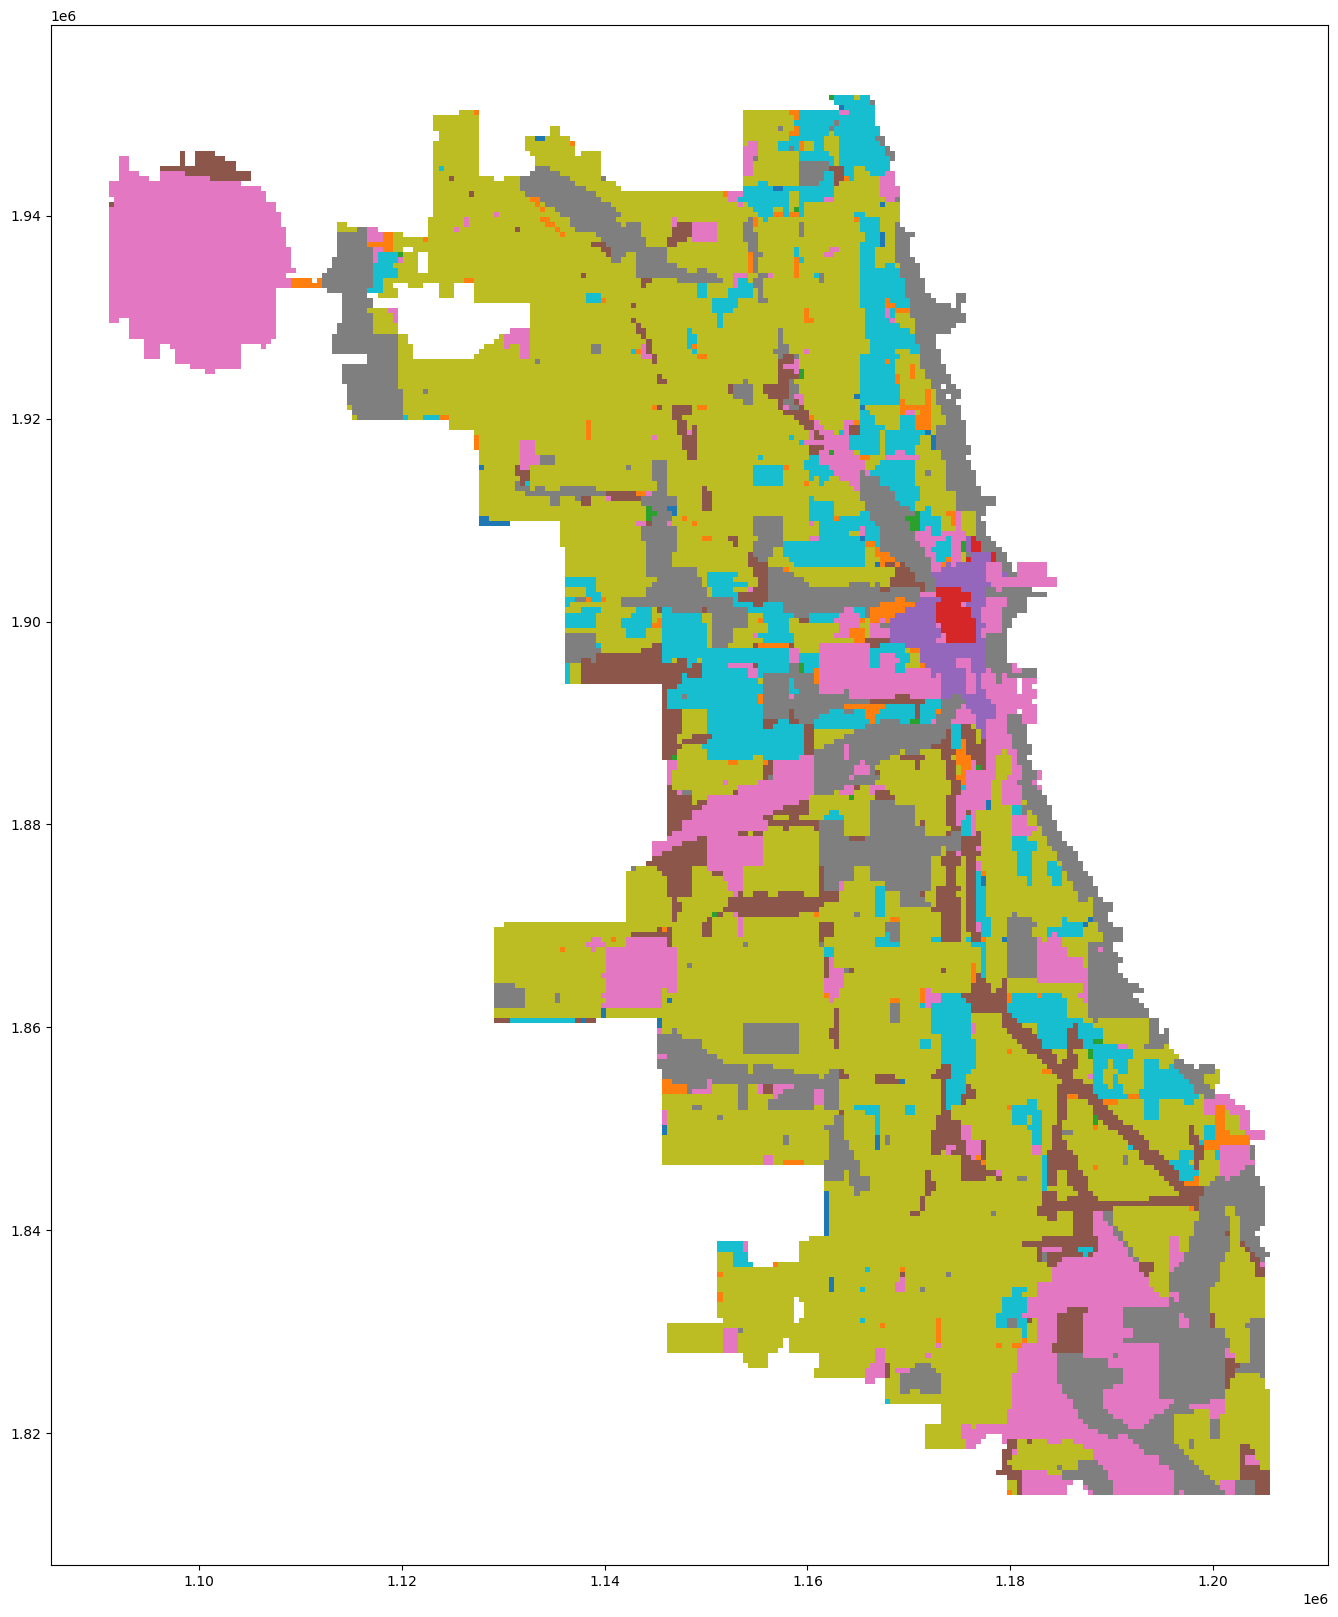

In [70]:

fig, ax  =plt.subplots(figsize = (20,20))
filtered_extracted.plot(column="zone_class", ax = ax)
plt.show()